## Hypothesis
DV1=INT

In [152]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [153]:
tmp <- cbind(INT1=data1$INT1,INT2=data1$INT2,INT3=data1$INT3)
data1$INT <- rowMeans(tmp)

In [154]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [155]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826 106
[1] 597 106


In [156]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"EnergyC",
"MC",
"Attitude",
"SubNorm",
"PBC",
"HabitC",
"ConvB1",
"INT",
"CashYN")

In [157]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "Attitude"    "BillS"       "BillW"       "CashYN"     
 [11] "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"     
 [16] "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"  
 [21] "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"     
 [26] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [31] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"    
 [36] "Frugal3"     "Gender"      "HabitC"      "HabitC1"     "HabitC2"    
 [41] "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"    
 [46] "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"      "HomeS"      
 [51] "HouseholdS"  "INT"         "INT1"        "INT2"        "INT3"       
 [56] "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"   
 [61] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [66] "IncHomeW"    "Income"      "Latitude"    "MC"          "MC1"        
 [71] "MC2"         "MC3"         "MC4"         "MC5"         "OwnRent"    
 [76] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
 [81] "PBC5"        "Political"   "RewardForm"  "SN"          "SN1"        
 [86] "SN2"         "SN3"         "SN4"         "Sqft"        "SqftCate"   
 [91] "State"       "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"   
 [96] "Summer_avg"  "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"     
[101] "Trust3"      "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF"
[106] "X.9to5"

[1] "Age"        "Attitude"   "CashYN"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Ethnic"     "Gender"     "HabitC"     "HouseholdS"
[11] "INT"        "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SqftCate"   "SubNorm"

In [158]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [159]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [160]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "SubNorm"    "HabitC"     "INT"

In [161]:
data1 [is.na(data1$IncHomeS), ]

IncHomeS,ConvB1,Age,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,EnergyC,Attitude,PBC,CashYN,MC,SubNorm,HabitC,INT


In [162]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 50  41 115 202  54  56  45  34 


  1   2   3   4   5 
 66 213 133 111  74 

In [163]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Ethnic"     "Income"    
[11] "Educ"       "EnergyC"    "Attitude"   "PBC"        "CashYN"    
[16] "MC"         "SubNorm"    "HabitC"     "INT"

In [164]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [165]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      1.81       1.25      11.21       0.50       0.52       1.12       1.21 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.83       0.38       2.00       1.10       1.39       1.10       0.94 
    CashYN         MC    SubNorm     HabitC        INT 
      0.27       1.08       1.35       1.42       1.14

In [166]:
hiCor(data2,.4)

,ConvB1,OwnRent,SqftCate,EnergyC,Attitude,PBC,MC,INT
ConvB1,1.000,0.077,0.061,-0.359,-0.463,-0.395,-0.403,-0.418
OwnRent,0.077,1.000,0.500,-0.053,-0.013,-0.042,0.049,-0.053
SqftCate,0.061,0.500,1.000,-0.078,-0.024,-0.099,-0.017,-0.099
EnergyC,-0.359,-0.053,-0.078,1.000,0.571,0.168,0.309,0.450
Attitude,-0.463,-0.013,-0.024,0.571,1.000,0.309,0.426,0.553
PBC,-0.395,-0.042,-0.099,0.168,0.309,1.000,0.329,0.436
MC,-0.403,0.049,-0.017,0.309,0.426,0.329,1.000,0.440
INT,-0.418,-0.053,-0.099,0.450,0.553,0.436,0.440,1.000


In [167]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.18
    ConvB1 EnergyC Attitude   PBC    MC SubNorm HabitC   INT
PC1   0.33   -0.36    -0.42 -0.26 -0.32   -0.29  -0.23 -0.43
[1] 0.3
     Age OwnRent SqftCate HouseholdS Income
PC2 0.36    0.51     0.51       0.26   0.42
[1] 0.37
    Gender HouseholdS Political Ethnic  Educ EnergyC   PBC HabitC
PC3   0.41       0.48      0.24   -0.4 -0.31    0.22 -0.25  -0.23
[1] 0.44
    ConvB1 HouseholdS Political Income  Educ EnergyC  PBC
PC4  -0.27       0.31     -0.44  -0.24 -0.55   -0.23 0.32
[1] 0.5
    IncHomeS  Age Gender CashYN HabitC
PC5     0.62 0.41    0.2   0.43  -0.27
[1] 0.56
      Age Gender HouseholdS Ethnic Income CashYN
PC6 -0.33  -0.41        0.2  -0.38    0.3   0.61
[1] 0.61
    IncHomeS ConvB1 Gender OwnRent Political Ethnic   PBC CashYN SubNorm
PC7     0.21   0.25   0.26   -0.22     -0.44   0.24 -0.26   0.25    0.52
[1] 0.66
    IncHomeS Ethnic EnergyC CashYN HabitC
PC8    -0.36   0.59    0.24   0.25  -0.51
[1] 0.7
    IncHomeS   Age Gender  PBC CashYN   MC SubNorm HabitC


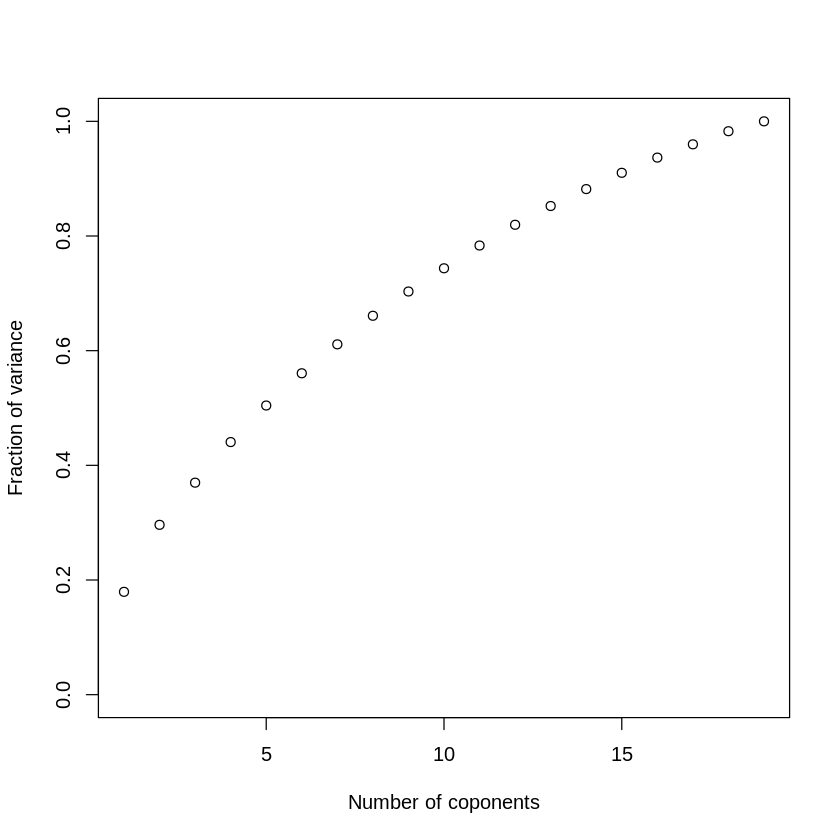

In [168]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [169]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [170]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Attitude,13,0.51
INT,19,0.51
EnergyC,12,0.40
SqftCate,6,0.38
OwnRent,5,0.33
ConvB1,2,0.30
Income,10,0.26
MC,16,0.26
HouseholdS,7,0.25
SubNorm,17,0.24
PBC,14,0.23


In [171]:
#IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [172]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Ethnic","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ConvB1")

In [173]:
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));

In [174]:
table(data2[,"INT"])


               1 1.66666666666667                2 2.33333333333333 
               2                2                6                3 
2.66666666666667                3 3.33333333333333 3.66666666666667 
               5               10               14               14 
               4 4.33333333333333 4.66666666666667                5 
              43               27               48               74 
5.33333333333333 5.66666666666667                6 6.33333333333333 
              66               53              118               34 
6.66666666666667                7 
              13               65 

In [175]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7046 -0.4662  0.0838  0.5327  1.9943 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.10929    0.42377   -0.26  0.79658    
Age         -0.00561    0.00329   -1.71  0.08831 .  
Gender      -0.05662    0.07055   -0.80  0.42251    
OwnRent      0.00962    0.07783    0.12  0.90166    
SqftCate    -0.04468    0.03764   -1.19  0.23565    
HouseholdS   0.01355    0.03157    0.43  0.66782    
Political    0.03826    0.04329    0.88  0.37714    
Ethnic      -0.06232    0.08964   -0.70  0.48719    
Income      -0.00844    0.01920   -0.44  0.66027    
Educ         0.02451    0.03254    0.75  0.45152    
EnergyC      0.07773    0.03053    2.55  0.01116 *  
MC           0.12512    0.03538    3.54  0.00044 ***
Attitude     0.37889    0.04040    9.38  < 2e-16 ***
SubNorm      0.11924    0.02772    4.30  2.0e-05 ***
PBC          0.23981    0.03898    6.15  1.4e-09 ***
Hab

In [176]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,0.40,0.40,0.61,4.3e-01
Gender,1,13.04,13.04,19.93,9.7e-06
OwnRent,1,0.68,0.68,1.04,3.1e-01
SqftCate,1,5.03,5.03,7.69,5.7e-03
HouseholdS,1,1.87,1.87,2.86,9.2e-02
Political,1,10.74,10.74,16.41,5.8e-05
Ethnic,1,2.20,2.20,3.36,6.7e-02
Income,1,0.25,0.25,0.38,5.4e-01
Educ,1,5.01,5.01,7.66,5.8e-03
EnergyC,1,118.63,118.63,181.33,3.7e-36


In [177]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS     ConvB1        Age     Gender    OwnRent   SqftCate HouseholdS 
      0.96       0.74       0.84       0.94       0.55       0.44       0.87 
 Political     Ethnic     Income       Educ    EnergyC   Attitude        PBC 
      0.93       0.99       0.74       0.98       0.61       0.40       0.84 
    CashYN         MC    SubNorm     HabitC        INT 
      0.99       0.74       0.78       0.87       0.39 

Loadings:
           Factor1 Factor2
ConvB1     -0.51          
EnergyC     0.62          
Attitude    0.77          
MC          0.51          
INT         0.78          
OwnRent             0.67  
SqftCate            0.74  
Income              0.51  
IncHomeS                  
Age                 0.39  
Gender                    
HouseholdS          0.35  
Political                 
Ethnic                    
Educ                      
PBC         0.39          
CashYN                    
Su

In [178]:
IndepPred = c("Age","Gender","OwnRent","SqftCate","HouseholdS","Political","Ethnic","Income","Educ","EnergyC","MC","Attitude","SubNorm","PBC","HabitC","ConvB1","CashYN")
fmla <- as.formula(paste("INT",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.7196 -0.4770  0.0724  0.5496  2.1096 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.31663    0.43818   -0.72  0.47020    
Age         -0.00591    0.00328   -1.80  0.07235 .  
Gender      -0.05367    0.07043   -0.76  0.44635    
OwnRent      0.01831    0.07783    0.24  0.81410    
SqftCate    -0.04357    0.03757   -1.16  0.24663    
HouseholdS   0.01463    0.03151    0.46  0.64268    
Political    0.04181    0.04325    0.97  0.33400    
Ethnic      -0.05662    0.08952   -0.63  0.52731    
Income      -0.01045    0.01920   -0.54  0.58639    
Educ         0.02312    0.03248    0.71  0.47687    
EnergyC      0.07875    0.03048    2.58  0.01001 *  
MC           0.12218    0.03534    3.46  0.00059 ***
Attitude     0.37646    0.04034    9.33  < 2e-16 ***
SubNorm      0.11840    0.02767    4.28  2.2e-05 ***
PBC          0.23813    0.03892    6.12  1.7e-09 ***
Hab